This project is part of Kaggle 'House prices' competition. I will try to built model which will be predict house prices based of house parameters. <br>
Data description in details are in file 'data_description.txt' in catalogue with this file. <br>

Notebook have is following structure:
1. Exploratory data analysis
1. Data cleaning
1. Feature engineering
1. Train part
1. Hyperoptimization
1. Test part

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Exploratory data analysis

Let's load train (and later test) data and have a look on it. In train part exist target variable 'SalePrice', in test - no.

In [8]:
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


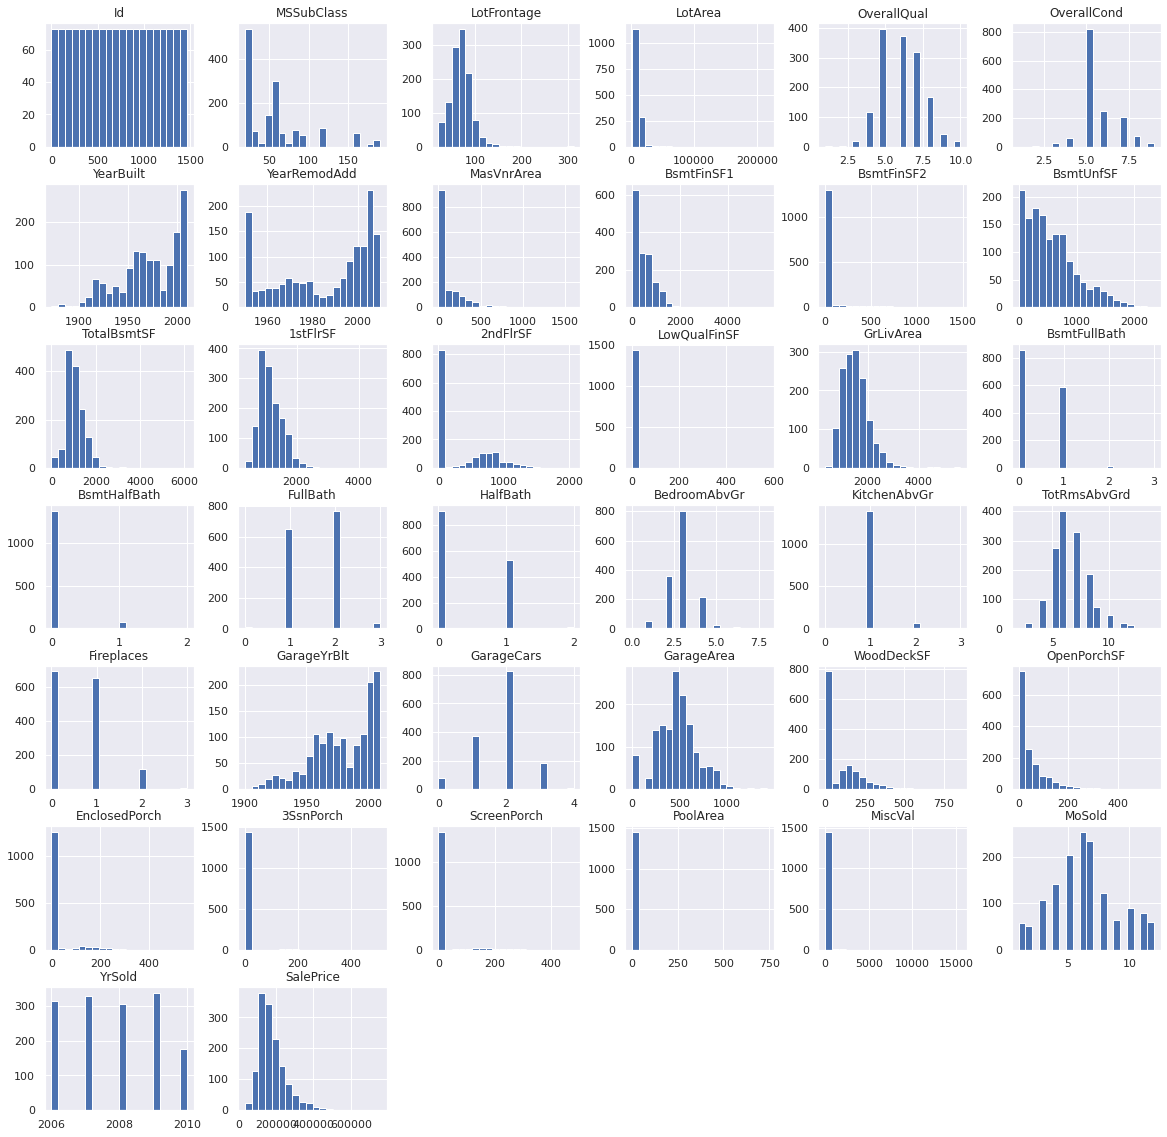

In [12]:
train_df.hist(figsize=(20, 20), bins=20);

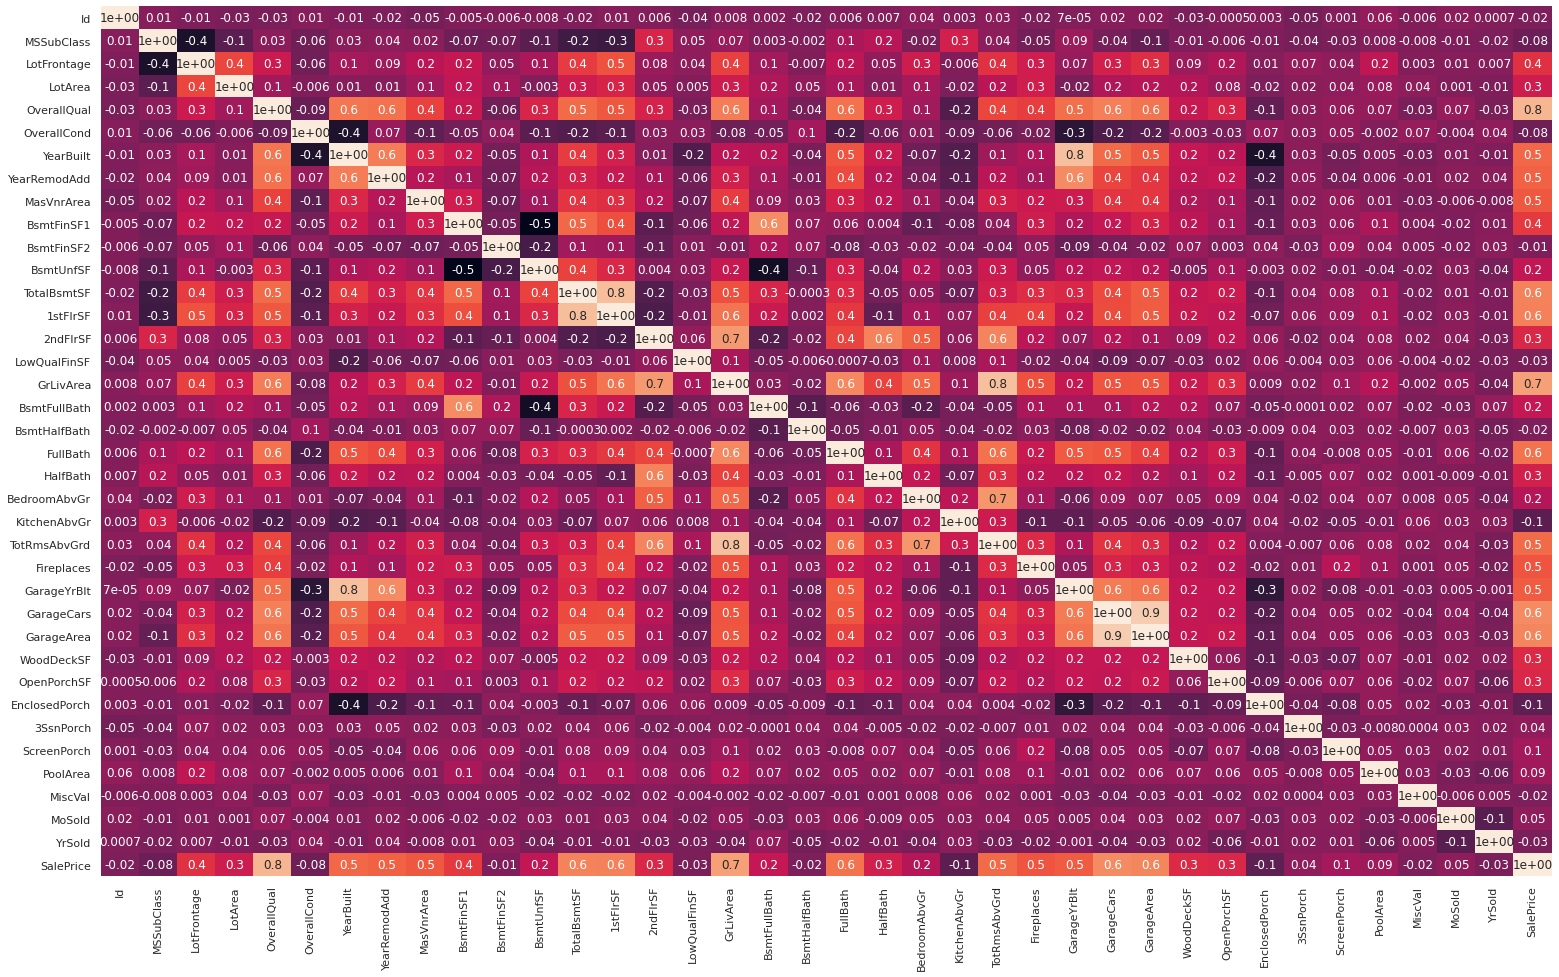

In [13]:
plt.figure(figsize=(26, 16))
sns.heatmap(train_df.corr(), cmap='rocket', annot=True, fmt=f'0.1', cbar=False);

Let's take a look  little bit closer to our target feature.

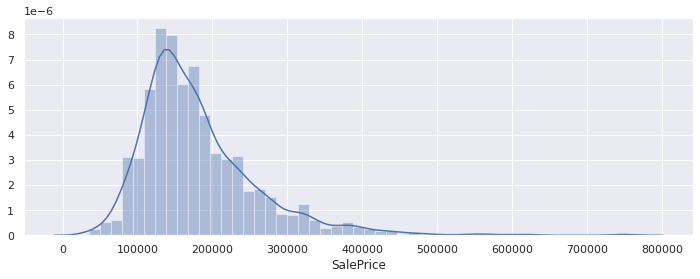

In [14]:
plt.figure(figsize=(12, 4))
sns.distplot(train_df['SalePrice']);

Data is right-skewed, let's see if log of price can handle with outliers.

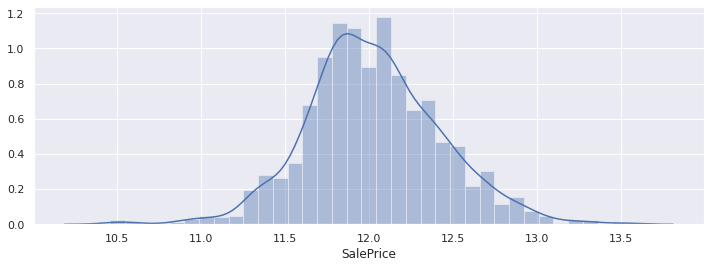

In [15]:
plt.figure(figsize=(12, 4))
sns.distplot(np.log(train_df['SalePrice']));

Logarithmic 'SalePrice' looks better due to normal distribution and I will use LogPrice as target variable.

In [16]:
train_df.shape

(1460, 81)

In [17]:
# Add price logarithm to dataset
train_df['LogPrice'] = np.log(train_df['SalePrice'])

# and remove SalePrice 
train_df = train_df.drop('SalePrice', axis=1)

In [18]:
# Correlation target feature with others features
train_df.corr()['LogPrice'].sort_values(ascending=False)

LogPrice         1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: LogPri

Let's see on some features with strong correlation.

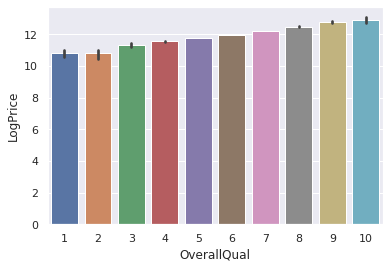

In [19]:
sns.barplot(x='OverallQual', y='LogPrice', data=train_df);

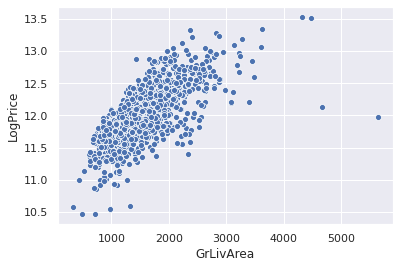

In [20]:
sns.scatterplot(x='GrLivArea', y='LogPrice', data=train_df);

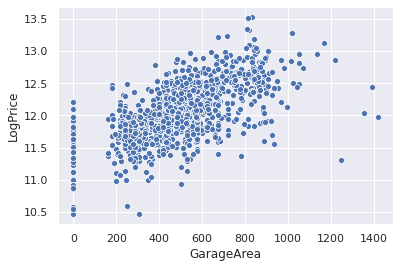

In [21]:
sns.scatterplot(x='GarageArea', y='LogPrice', data=train_df);

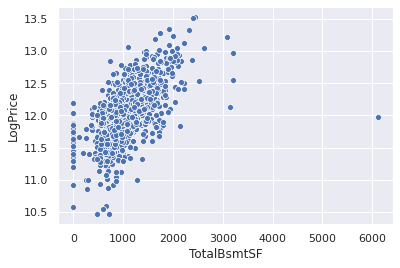

In [22]:
sns.scatterplot(x='TotalBsmtSF', y='LogPrice', data=train_df);

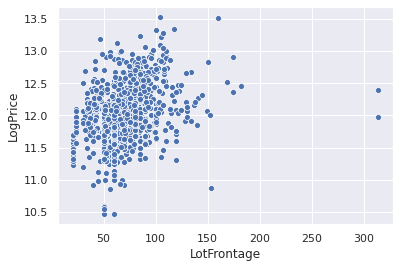

In [23]:
sns.scatterplot(x='LotFrontage', y='LogPrice', data=train_df);

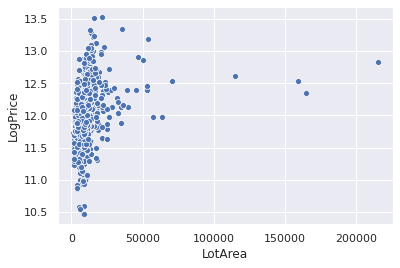

In [24]:
sns.scatterplot(x='LotArea', y='LogPrice', data=train_df);

### Data cleaning

So, I'm going to concatenate train and test data in order to avoid duplicating code when I will be cleaning data. And later I will saparate it before training part.

In [25]:
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [26]:
# Save train and test ID for final prediction on test part
test_id = test_df.pop('Id')
train_id = train_df.pop('Id')

# Save train length 
n_train = train_df.shape[0]

# Set target variable and drop it from dataset
labels = train_df.pop('LogPrice')

In [27]:
# Concatenate train and test part
df = pd.concat([train_df, test_df], axis=0)
df.reset_index(inplace=True, drop=True)

In [28]:
df.shape

(2919, 79)

In [29]:
test_df.shape, train_df.shape

((1459, 79), (1460, 79))

In [30]:
# Check empty values
pd.DataFrame({'Amount': df.isnull().sum(),
                     'Percent': (df.isnull().sum() / len(df)) *100}).sort_values(by='Percent', ascending=False)


,Amount,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


In PoolQC, MiscFeature, Alley, Fence most of data is missing. I'm goind to drop all these columns.

In [31]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

In [32]:
# FireplaceQu
df['Fireplaces'].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

In [33]:
df['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

It seems empty FireplaceQu is house without Fireplace at all. I fill it with NA.

In [34]:
df['FireplaceQu'].fillna('NA', inplace=True)

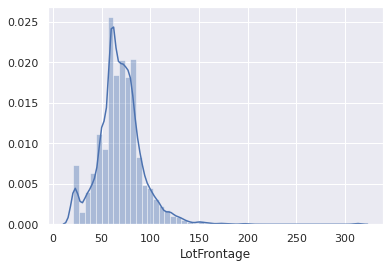

In [35]:
# LotFrontage 
sns.distplot(df['LotFrontage'])

For 'LotFrontage' we have 259 empty records, there are too many to delete. And we can see that there are no values  equal to 0. So we can try to fill these empty values with median (because we have some outliers).

In [36]:
lot_frontage_median = df['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(lot_frontage_median)

In [37]:
# Garages' features
df[df['GarageYrBlt'].isnull()].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseP,1152,0,0,1152,0.0,0.0,2,0,2,2,Fa,6,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand
48,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,736.0,736.0,GasA,Gd,Y,SBrkr,736,716,0,1452,0.0,0.0,2,0,2,3,TA,8,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial
78,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1768.0,1768.0,GasA,TA,N,SBrkr,1768,0,0,1768,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal
88,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1013.0,1013.0,GasA,TA,N,SBrkr,1013,0,513,1526,0.0,0.0,1,0,2,1,Fa,6,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml
89,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588.0,Unf,0.0,402.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal




Where 'GarageYrBlt' equals 'NaN', there other empty 'garage' values is empty, as well. Follow desciription data it means no garage.


In [38]:
# Numerical features replace with number
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0) 

# Features replace with 'NA'
for column in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[column] = df[column].fillna('NA')

In [39]:
# Bsmts' features
df[df['BsmtExposure'].isnull()].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
17,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1296,0,0,1296,0.0,0.0,2,0,2,2,TA,6,Typ,0,NA,CarPort,1967.0,Unf,2.0,516.0,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseP,1152,0,0,1152,0.0,0.0,2,0,2,2,Fa,6,Typ,0,NA,NA,0.0,NA,0.0,0.0,NA,NA,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand
90,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1040,0,0,1040,0.0,0.0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1950.0,Unf,2.0,420.0,TA,TA,Y,0,29,0,0,0,0,0,7,2006,WD,Normal
102,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,Attchd,1979.0,Unf,2.0,410.0,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Alloca
156,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseF,1040,0,0,1040,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1950.0,Unf,2.0,625.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal


The same situation as above: where 'BsmtExposure' is 'null', there other 'Bsmt' features are 'null', as well.

In [40]:
for column in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[column] = df[column].fillna('NA')

In [41]:
# MasVnrType
df[df['MasVnrType'].isnull()].head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
234,60,RL,68.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,0,5,2010,WD,Normal
529,20,RL,68.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca
650,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NA,Attchd,2007.0,RFn,2.0,562.0,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal
936,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,Normal
973,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial


Same here. Where 'MasVnrType' is null, there MasVnrArea - 0

In [42]:
df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [43]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

Rest columns have 1-2 empty values, but as I concatenate train and test part I can't delete it. <br>
I'm going to fill rest values with 0, 'None' or with most occurred value.

In [44]:
# MSZoning
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [45]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [46]:
# BsmtBaths
df['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [47]:
df['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [48]:
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)

In [49]:
# Functional
df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [50]:
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

In [51]:
# Electrical
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [52]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [53]:
# Utilities
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [54]:
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

In [55]:
# TotalBsmtSF
df[df['TotalBsmtSF'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,Abnorml


In [56]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


In [57]:
# TotalBsmtSf has strong correlation with 1stFlrSf
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['1stFlrSF'])

In [58]:
# BsmtUnfSf, BsmtFinSF2, BsmtFinSF1
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)

In [59]:
# Garage
df[df['GarageCars'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2576,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,0.0,NA,NaN,NaN,NA,NA,Y,174,0,212,0,0,0,0,3,2007,WD,Alloca


In [60]:
df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)

In [61]:
# Rest empty categorical values fill with mode
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [62]:
pd.DataFrame({'Amount': df.isnull().sum(),
                     'Percent': (df.isnull().sum() / len(df)) *100}).sort_values(by='Percent', ascending=False)


,Amount,Percent
MSSubClass,0,0.0
GarageType,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
FullBath,0,0.0


### Feature engineering



So, now is no more empty values. Let's transform categorical data to numbers.
I will use 3 methods:

*     Label encoder 
*     One hot encoding
*     And for features with clear scale I will map these features


In [63]:
# Generally we have 3 main feature types with scale
qual_columns = ['GarageCond', 'GarageQual', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 
           'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual'] 
bsmt_columns = ['BsmtFinType2', 'BsmtFinType1'] 
exposure_columns = ['BsmtExposure']

rates_qual = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
rates_basmtype = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': -1, 'NA': 0}
rates_exposure = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': -1, 'NA': 0}

In [86]:
# Map features with clear scale
for feats, rate in ((qual_columns, rates_qual),  (bsmt_columns, rates_basmtype), (exposure_columns, rates_exposure)):
    for feat in feats:
        df[feat] = df[feat].map(rate)

In [65]:
# LabelEncoder 
encode = ['Functional', 'CentralAir', 'PavedDrive', 'GarageFinish', 'Street', 'LandSlope']

for feat in encode:
    df['{0}_cat'.format(feat)] = pd.factorize(df[feat])[0]

# OneHotEncoding
categorical_features = [x for x in df.select_dtypes(include=np.object).columns if x not in encode]

for feat in categorical_features:
    dummies = pd.get_dummies(df[feat], prefix='{0}'.format(feat), drop_first=True)
    df = pd.concat([df, dummies], axis=1)

Let's add some new features.

In [66]:
df['BsmtFin'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] 
df['TotalBsmt'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [67]:
df.shape

(2919, 225)

I will separate data on train and test datasets and I will store test data for final prediction. <br>

In [68]:
train_set = df[:n_train]
test_set = df[n_train:]

### Machine learing part

In [69]:
# import necessary libraries
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [70]:
# Set X and y
X = train_set[train_set.select_dtypes(include=np.number).columns].values
y = labels

# Normalise features
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)

In [71]:
# Create list of models
lasso_model = Lasso()
elastic_model = ElasticNet()
svr_model = SVR()
tree_model = ExtraTreesRegressor()
xgb_model = XGBRegressor()
knn_model = KNeighborsRegressor()

models = {'lasso_model': lasso_model,
         'elastic_model': elastic_model,
         'svr_model': svr_model,
         'tree_model': tree_model,
         'xgb_model': xgb_model,
         'knn_model': knn_model}

In [72]:
def cross_validation(model, X=X_scaled, y=y):
    score = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    cross_score = np.sqrt(-score)
    return round(np.mean(cross_score), 4)

In [73]:
# Check models with cross validation
models_evaluation = {}
for model_name, model in models.items():
    models_evaluation[model_name] = cross_validation(model)
    
pd.DataFrame(data=models_evaluation.items(), columns=['Model', 'RMSE']).sort_values(by='RMSE')

,Model,RMSE
2,svr_model,0.1325
3,tree_model,0.1353
4,xgb_model,0.1395
5,knn_model,0.2054
0,lasso_model,0.3992
1,elastic_model,0.3992


I'm going to ensemble best models and train it with voting method. But first I will improve model's parameters.

### Hyperoptimization

XGBoost perform the best result, so let's try to achieve with it a little bit more. <br>
* Features importances
* Search better parameters for models

In [74]:
xgb_model.fit(X_scaled, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
# Get features importances
features_list = sorted(zip(xgb_model.feature_importances_, train_set.select_dtypes(include=np.number).columns), reverse=True)
features_list

[(0.13470845, 'GarageCars'),
 (0.104387216, 'OverallQual'),
 (0.103761524, 'KitchenQual'),
 (0.09588872, 'TotalBsmt'),
 (0.059303753, 'Neighborhood_OldTown'),
 (0.045465812, 'CentralAir_cat'),
 (0.043811366, 'Exterior1st_BrkComm'),
 (0.026132358, 'GarageCond'),
 (0.024594277, 'RoofStyle_Gambrel'),
 (0.01884361, 'FireplaceQu'),
 (0.016929371, 'SaleCondition_Partial'),
 (0.015150049, 'MSZoning_RL'),
 (0.013619364, 'GarageType_Basment'),
 (0.012210356, 'BsmtQual'),
 (0.012142087, 'SaleCondition_Alloca'),
 (0.011379168, 'PoolArea'),
 (0.009967651, 'Functional_cat'),
 (0.009335354, 'YearRemodAdd'),
 (0.009252613, 'Neighborhood_Crawfor'),
 (0.009041637, 'RoofMatl_Tar&Grv'),
 (0.008427762, 'Condition1_PosA'),
 (0.008409254, 'KitchenAbvGr'),
 (0.008142467, 'SaleCondition_Family'),
 (0.006392555, 'Exterior2nd_VinylSd'),
 (0.0057159304, 'BsmtFinType1'),
 (0.0051083383, 'OverallCond'),
 (0.0046763094, 'Condition1_PosN'),
 (0.004603827, 'BsmtFullBath'),
 (0.004546711, 'RoofMatl_CompShg'),
 (0.0043

In [76]:
# Leave only useful features
imp_feats = [x for (n, x) in features_list if n > 0.001]

In [77]:
# Set X with new feature set
X = train_set[imp_feats].values
X_scaled = scalar.fit_transform(X)

In [78]:
cross_validation(xgb_model)

0.1339

In [79]:
# Search better parameters for xgb_model 
param_grid = {'n_estimators': np.arange(100, 1500),
             'learning_rate': np.arange(0.01, 1, 0.01),
             'max_depth': np.arange(1, 20),
             'colsample_bytree': np.arange(0, 1, 0.1)}

random_search = RandomizedSearchCV(xgb_model, param_grid, cv=10, scoring='neg_mean_squared_error', n_iter=100)
random_search.fit(X_scaled, y)

best_xgb = random_search.best_estimator_

In [80]:
cross_validation(best_xgb)

0.1235

In [81]:
# Search better parameters for svm model 
svr_params = {'C': np.arange(1, 30),
             'kernel': ('linear', 'poly', 'rbf', 'sigmoid')}

hyperopt_svr = RandomizedSearchCV(svr_model, svr_params, cv=10, scoring='neg_mean_squared_error', n_iter=100)
hyperopt_svr.fit(X_scaled, y)

best_svr = hyperopt_svr.best_estimator_

In [82]:
cross_validation(best_svr)

0.1279

So, these steps improved our model. Now let's ensemble better models to one and train out final model.

In [83]:
# Ensemble better models
voting_reg = VotingRegressor(estimators=[('xgb', best_xgb), ('svr', best_svr)])

cross_validation(voting_reg)

0.1193

In [84]:
# Final model training 
voting_reg.fit(X_scaled, y)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.4, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.03, max_delta_step=0,
                                          max_depth=5, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=577, n_jobs=0,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scal

### Test part

In [85]:
# Get X for test part
X_test = test_set[imp_feats].values
X_test_scaled = scaler.transform(X_test)

# Make prediction
y_pred = voting_reg.predict(X_test_scaled)

# Convert LopPrice to normal and save it to csv in order to upload on Kaggle
test_file = pd.DataFrame({'Id': test_id, 'SalePrice': np.exp(np.ravel(y_pred))})
test_file.to_csv('submission.csv', index=False)

In [98]:
np.exp(y_pred)

array([122851.71483936, 158540.56622673, 181167.14453986, ...,
       157540.09705092, 114008.35739076, 216906.74300356])

So, I achieved 0.12089 score for train set on Kaggle for my prediction (Kaggle use RMSLE metric).